In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.ticker import FuncFormatter
import re

In [2]:
# Năm 2018
# Đọc file Excel, bỏ qua 7 dòng đầu tiên
df2018 = pd.read_excel("2018-Vietnam.xlsx", skiprows=7,header=1)
df2018= df2018.iloc[:, 1:]
# Lọc ra các dòng có 'Mã' chứa 'PPC'
PPCdf2018 = df2018[df2018['Mã'].str.contains('PPC', case=False, na=False)]
# Đặt tên của các hàng là '2018'
PPCdf2018['dbYear'] = 2018
for i in range (len(PPCdf2018.columns)):
  if "\nHợp nhất\nQuý: Hàng năm\nNăm: 2021\n" in PPCdf2018.columns[i]:
    PPCdf2018.columns = PPCdf2018.columns.str.replace("\nHợp nhất\nQuý: Hàng năm\nNăm: 2021\n", " ")
PPCdf2018

C:\Users\Dell\AppData\Local\Temp\ipykernel_12080\857370773.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PPCdf2018['dbYear'] = 2018


,Mã,Tên công ty,Sàn,Ngành ICB - cấp 1,Ngành ICB - cấp 2,Ngành ICB - cấp 3,Ngành ICB - cấp 4,Quý,Năm,Trạng thái kiểm toán,...,TM. Chi phí sản xuất theo yếu tố Đơn vị: Triệu VND,"TM. Chi phí nguyên liệu, vật liệu Đơn vị: Triệu VND",TM. Chi phí nhân công Đơn vị: Triệu VND,TM.Chi phí khấu hao tài sản cố định Đơn vị: Triệu VND,TM. Chi phí dịch vụ mua ngoài Đơn vị: Triệu VND,TM. Chi phí khác bằng tiền Đơn vị: Triệu VND,BCTCKH. Doanh thu kế hoạch Đơn vị: Triệu VND,BCTCKH. Tổng lợi nhuận kế toán trước thuế Đơn vị: Triệu VND,BCTCKH. Lợi nhuận sau thuế thu nhập doanh nghiệp Đơn vị: Triệu VND,dbYear
284,PPC,Nhiệt điện Phả Lại,HOSE,Tiện ích Cộng đồng,"Điện, nước & xăng dầu khí đốt",Sản xuất & Phân phối Điện,Sản xuất & Phân phối Điện,5.0,2021.0,Chưa kiểm toán,...,3.806237e+12,3.170699e+12,1.895562e+11,5.830460e+10,7.425740e+10,3.134194e+11,5.427600e+12,2.778500e+11,2.222800e+11,2018


In [3]:
# Năm 2019
df2019 = pd.read_excel("2019-Vietnam.xlsx", skiprows=7, header=1)
PPCdf2019 = df2019[df2019['Mã'].str.contains('PPC', case=False, na=False)]
PPCdf2019['dbYear'] = 2019
for i in range (len(PPCdf2019.columns)):
  if "\nHợp nhất\nQuý: Hàng năm\nNăm: 2020\n" in PPCdf2019.columns[i]:
    PPCdf2019.columns = PPCdf2019.columns.str.replace("\nHợp nhất\nQuý: Hàng năm\nNăm: 2020\n", " ")
PPCdf2019

C:\Users\Dell\AppData\Local\Temp\ipykernel_12080\291030187.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PPCdf2019['dbYear'] = 2019


,STT,Mã,Tên công ty,Sàn,Ngành ICB - cấp 1,Ngành ICB - cấp 2,Ngành ICB - cấp 3,Ngành ICB - cấp 4,Quý,Năm,...,TM. Chi phí sản xuất theo yếu tố Đơn vị: Triệu VND,"TM. Chi phí nguyên liệu, vật liệu Đơn vị: Triệu VND",TM. Chi phí nhân công Đơn vị: Triệu VND,TM.Chi phí khấu hao tài sản cố định Đơn vị: Triệu VND,TM. Chi phí dịch vụ mua ngoài Đơn vị: Triệu VND,TM. Chi phí khác bằng tiền Đơn vị: Triệu VND,BCTCKH. Doanh thu kế hoạch Đơn vị: Triệu VND,BCTCKH. Tổng lợi nhuận kế toán trước thuế Đơn vị: Triệu VND,BCTCKH. Lợi nhuận sau thuế thu nhập doanh nghiệp Đơn vị: Triệu VND,dbYear
284,285,PPC,Nhiệt điện Phả Lại,HOSE,Tiện ích Cộng đồng,"Điện, nước & xăng dầu khí đốt",Sản xuất & Phân phối Điện,Sản xuất & Phân phối Điện,5.0,2020.0,...,6.648609e+12,5.954895e+12,2.558409e+11,3.712371e+10,1.062310e+11,2.945178e+11,5.658110e+12,4.145900e+11,3.316720e+11,2019


In [4]:
# Năm 2020
df2020 = pd.read_excel("2020-Vietnam.xlsx", skiprows=7, header=1)
df2020 = df2020.iloc[:, 1:]
PPCdf2020 = df2020[df2020['Mã'].str.contains('PPC', case=False, na=False)]
PPCdf2020['dbYear'] = 2020
for i in range (len(PPCdf2020.columns)):
  if "\nHợp nhất\nQuý: Hàng năm\nNăm: 2019\n" in PPCdf2020.columns[i]:
    PPCdf2020.columns = PPCdf2020.columns.str.replace("\nHợp nhất\nQuý: Hàng năm\nNăm: 2019\n", " ")
PPCdf2020

C:\Users\Dell\AppData\Local\Temp\ipykernel_12080\1032147199.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PPCdf2020['dbYear'] = 2020


,Mã,Tên công ty,Sàn,Ngành ICB - cấp 1,Ngành ICB - cấp 2,Ngành ICB - cấp 3,Ngành ICB - cấp 4,Quý,Năm,Trạng thái kiểm toán,...,TM. Chi phí sản xuất theo yếu tố Đơn vị: Triệu VND,"TM. Chi phí nguyên liệu, vật liệu Đơn vị: Triệu VND",TM. Chi phí nhân công Đơn vị: Triệu VND,TM.Chi phí khấu hao tài sản cố định Đơn vị: Triệu VND,TM. Chi phí dịch vụ mua ngoài Đơn vị: Triệu VND,TM. Chi phí khác bằng tiền Đơn vị: Triệu VND,BCTCKH. Doanh thu kế hoạch Đơn vị: Triệu VND,BCTCKH. Tổng lợi nhuận kế toán trước thuế Đơn vị: Triệu VND,BCTCKH. Lợi nhuận sau thuế thu nhập doanh nghiệp Đơn vị: Triệu VND,dbYear
284,PPC,Nhiệt điện Phả Lại,HOSE,Tiện ích Cộng đồng,"Điện, nước & xăng dầu khí đốt",Sản xuất & Phân phối Điện,Sản xuất & Phân phối Điện,5.0,2019.0,Chưa kiểm toán,...,6.979794e+12,6.115663e+12,2.620953e+11,3.545350e+10,1.113275e+11,4.552543e+11,8.277120e+12,7.654700e+11,6.123760e+11,2020


In [5]:
# Năm 2021
df2021 = pd.read_excel("2021-Vietnam.xlsx", skiprows=7, header=1)
df2021 = df2021.iloc[:, 1:]
PPCdf2021 = df2021[df2021['Mã'].str.contains('PPC', case=False, na=False)]
PPCdf2021['dbYear'] = 2021
for i in range (len(PPCdf2021.columns)):
  if "\nHợp nhất\nQuý: Hàng năm\nNăm: 2018\n" in PPCdf2021.columns[i]:
    PPCdf2021.columns = PPCdf2021.columns.str.replace("\nHợp nhất\nQuý: Hàng năm\nNăm: 2018\n", " ")
PPCdf2021

C:\Users\Dell\AppData\Local\Temp\ipykernel_12080\1704371720.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PPCdf2021['dbYear'] = 2021


,Mã,Tên công ty,Sàn,Ngành ICB - cấp 1,Ngành ICB - cấp 2,Ngành ICB - cấp 3,Ngành ICB - cấp 4,Quý,Năm,Trạng thái kiểm toán,...,TM. Chi phí sản xuất theo yếu tố Đơn vị: Triệu VND,"TM. Chi phí nguyên liệu, vật liệu Đơn vị: Triệu VND",TM. Chi phí nhân công Đơn vị: Triệu VND,TM.Chi phí khấu hao tài sản cố định Đơn vị: Triệu VND,TM. Chi phí dịch vụ mua ngoài Đơn vị: Triệu VND,TM. Chi phí khác bằng tiền Đơn vị: Triệu VND,BCTCKH. Doanh thu kế hoạch Đơn vị: Triệu VND,BCTCKH. Tổng lợi nhuận kế toán trước thuế Đơn vị: Triệu VND,BCTCKH. Lợi nhuận sau thuế thu nhập doanh nghiệp Đơn vị: Triệu VND,dbYear
284,PPC,Nhiệt điện Phả Lại,HOSE,Tiện ích Cộng đồng,"Điện, nước & xăng dầu khí đốt",Sản xuất & Phân phối Điện,Sản xuất & Phân phối Điện,5.0,2018.0,Chưa kiểm toán,...,6.058463e+12,5.081604e+12,2.854528e+11,3.395197e+10,8.957154e+10,5.678821e+11,7.530960e+12,7.814200e+11,6.251360e+11,2021


In [6]:
# Năm 2022
df2022 = pd.read_excel("2022-Vietnam.xlsx", skiprows=7, header=1)
df2022 = df2022.iloc[:, 1:]
PPCdf2022 = df2022[df2022['Mã'].str.contains('PPC', case=False, na=False)]
PPCdf2022['dbYear'] = 2022
for i in range (len(PPCdf2022.columns)):
  if "\nHợp nhất\nQuý: Hàng năm\nNăm: 2022\n" in PPCdf2022.columns[i]:
    PPCdf2022.columns = PPCdf2022.columns.str.replace("\nHợp nhất\nQuý: Hàng năm\nNăm: 2022\n", " ")
PPCdf2022

C:\Users\Dell\AppData\Local\Temp\ipykernel_12080\1638880206.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PPCdf2022['dbYear'] = 2022


,Mã,Tên công ty,Sàn,Ngành ICB - cấp 1,Ngành ICB - cấp 2,Ngành ICB - cấp 3,Ngành ICB - cấp 4,Quý,Năm,Trạng thái kiểm toán,...,TM. Chi phí sản xuất theo yếu tố Đơn vị: Triệu VND,"TM. Chi phí nguyên liệu, vật liệu Đơn vị: Triệu VND",TM. Chi phí nhân công Đơn vị: Triệu VND,TM.Chi phí khấu hao tài sản cố định Đơn vị: Triệu VND,TM. Chi phí dịch vụ mua ngoài Đơn vị: Triệu VND,TM. Chi phí khác bằng tiền Đơn vị: Triệu VND,BCTCKH. Doanh thu kế hoạch Đơn vị: Triệu VND,BCTCKH. Tổng lợi nhuận kế toán trước thuế Đơn vị: Triệu VND,BCTCKH. Lợi nhuận sau thuế thu nhập doanh nghiệp Đơn vị: Triệu VND,dbYear
284,PPC,Nhiệt điện Phả Lại,HOSE,Tiện ích Cộng đồng,"Điện, nước & xăng dầu khí đốt",Sản xuất & Phân phối Điện,Sản xuất & Phân phối Điện,5.0,2022.0,Chưa kiểm toán,...,5.012399e+12,4.254693e+12,2.769399e+11,6.132184e+10,5.403558e+10,3.654089e+11,5.948970e+12,2.666100e+11,2.132880e+11,2022


In [7]:
df= pd.concat([PPCdf2018, PPCdf2019, PPCdf2020, PPCdf2021, PPCdf2022])
df = df.fillna(0)
df

,Mã,Tên công ty,Sàn,Ngành ICB - cấp 1,Ngành ICB - cấp 2,Ngành ICB - cấp 3,Ngành ICB - cấp 4,Quý,Năm,Trạng thái kiểm toán,...,TM. Chi phí nhân công Đơn vị: Triệu VND,TM.Chi phí khấu hao tài sản cố định Đơn vị: Triệu VND,TM. Chi phí dịch vụ mua ngoài Đơn vị: Triệu VND,TM. Chi phí khác bằng tiền Đơn vị: Triệu VND,BCTCKH. Doanh thu kế hoạch Đơn vị: Triệu VND,BCTCKH. Tổng lợi nhuận kế toán trước thuế Đơn vị: Triệu VND,BCTCKH. Lợi nhuận sau thuế thu nhập doanh nghiệp Đơn vị: Triệu VND,dbYear,STT,CĐKT. Tài sản cố định Đơn vị: Triệu VND
284,PPC,Nhiệt điện Phả Lại,HOSE,Tiện ích Cộng đồng,"Điện, nước & xăng dầu khí đốt",Sản xuất & Phân phối Điện,Sản xuất & Phân phối Điện,5.0,2021.0,Chưa kiểm toán,...,1.895562e+11,5.830460e+10,7.425740e+10,3.134194e+11,5.427600e+12,2.778500e+11,2.222800e+11,2018,0,0.000000e+00
284,PPC,Nhiệt điện Phả Lại,HOSE,Tiện ích Cộng đồng,"Điện, nước & xăng dầu khí đốt",Sản xuất & Phân phối Điện,Sản xuất & Phân phối Điện,5.0,2020.0,Chưa kiểm toán,...,2.558409e+11,3.712371e+10,1.062310e+11,2.945178e+11,5.658110e+12,4.145900e+11,3.316720e+11,2019,285,2.890592e+11
284,PPC,Nhiệt điện Phả Lại,HOSE,Tiện ích Cộng đồng,"Điện, nước & xăng dầu khí đốt",Sản xuất & Phân phối Điện,Sản xuất & Phân phối Điện,5.0,2019.0,Chưa kiểm toán,...,2.620953e+11,3.545350e+10,1.113275e+11,4.552543e+11,8.277120e+12,7.654700e+11,6.123760e+11,2020,0,2.739574e+11
284,PPC,Nhiệt điện Phả Lại,HOSE,Tiện ích Cộng đồng,"Điện, nước & xăng dầu khí đốt",Sản xuất & Phân phối Điện,Sản xuất & Phân phối Điện,5.0,2018.0,Chưa kiểm toán,...,2.854528e+11,3.395197e+10,8.957154e+10,5.678821e+11,7.530960e+12,7.814200e+11,6.251360e+11,2021,0,2.850967e+11
284,PPC,Nhiệt điện Phả Lại,HOSE,Tiện ích Cộng đồng,"Điện, nước & xăng dầu khí đốt",Sản xuất & Phân phối Điện,Sản xuất & Phân phối Điện,5.0,2022.0,Chưa kiểm toán,...,2.769399e+11,6.132184e+10,5.403558e+10,3.654089e+11,5.948970e+12,2.666100e+11,2.132880e+11,2022,0,3.229644e+11


## VISUALIZE DATA

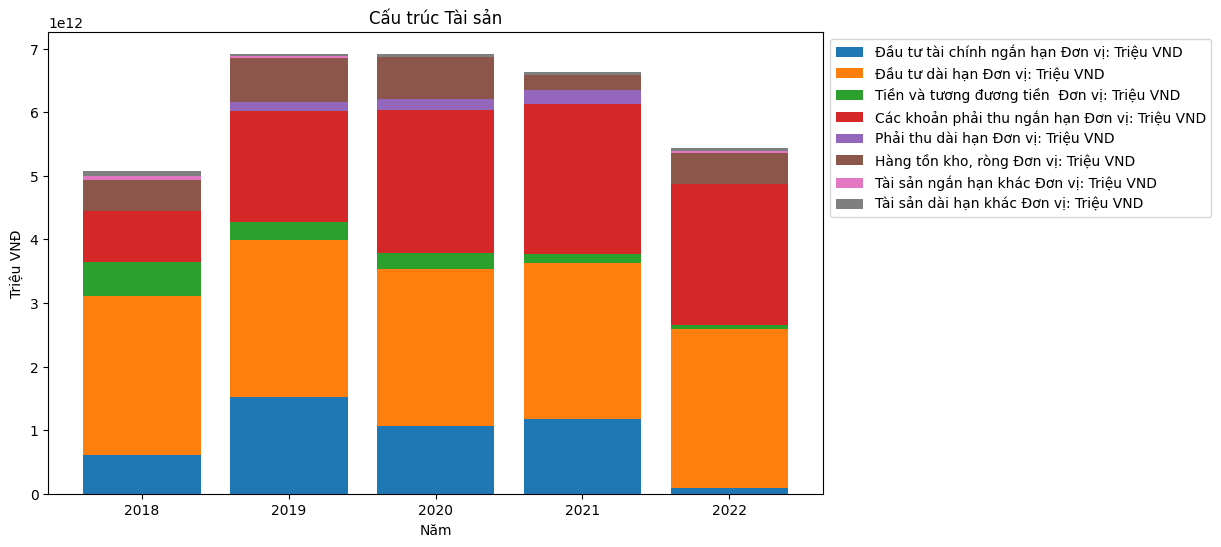

In [8]:
# Chuyển đổi cột 'dbYear' thành kiểu datetime
df['dbYear'] = pd.to_datetime(df['dbYear'])
df['dbYear'] = pd.to_numeric(df['dbYear'], errors='coerce')
df.sort_values(by='dbYear', inplace=True)
# Các cột cần vẽ biểu đồ chồng
columns_to_plot = [
    'CĐKT. Đầu tư tài chính ngắn hạn Đơn vị: Triệu VND',
    'CĐKT. Đầu tư dài hạn Đơn vị: Triệu VND',
    'CĐKT. Tiền và tương đương tiền  Đơn vị: Triệu VND',
    'CĐKT. Các khoản phải thu ngắn hạn Đơn vị: Triệu VND',
    'CĐKT. Phải thu dài hạn Đơn vị: Triệu VND',
    'CĐKT. Hàng tồn kho, ròng Đơn vị: Triệu VND',
    'CĐKT. Tài sản ngắn hạn khác Đơn vị: Triệu VND',
    'CĐKT. Tài sản dài hạn khác Đơn vị: Triệu VND'
]
# Vẽ biểu đồ cột chồng
plt.figure(figsize=(10, 6))
bottom = None
for col in columns_to_plot:
    plt.bar(df['dbYear'], df[col], label=col.split('. ')[1], bottom=bottom)
    if bottom is None:
        bottom = df[col].values
    else:
        bottom += df[col].values
plt.xlabel('Năm')
plt.ylabel('Triệu VNĐ')
plt.title('Cấu trúc Tài sản')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

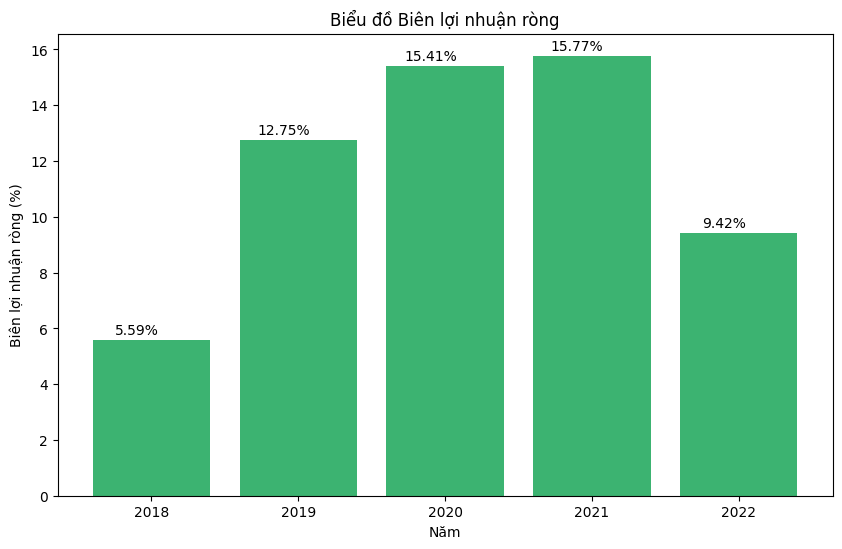

In [9]:
#Tính toán giá trị 
bien_loi_nhuan_rong = (df['KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp Đơn vị: Triệu VND'] / df['KQKD. Doanh thu thuần Đơn vị: Triệu VND']) * 100

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
bars = plt.bar(df['dbYear'], bien_loi_nhuan_rong, color='mediumseagreen')
# Thêm giá trị trên cột
for bar, value in zip(bars, bien_loi_nhuan_rong):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1, f'{value:.2f}%', ha='center', va='bottom')
plt.xlabel('Năm')
plt.ylabel('Biên lợi nhuận ròng (%)')
plt.title('Biểu đồ Biên lợi nhuận ròng')
plt.show()

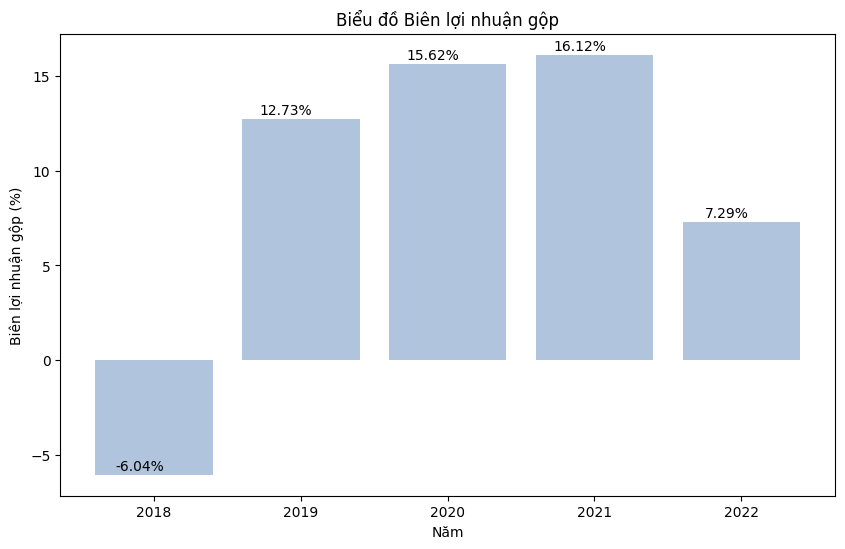

In [10]:
#Tính toán giá trị 
bien_loi_nhuan_gop = (df['KQKD. Lợi nhuận gộp về bán hàng và cung cấp dịch vụ Đơn vị: Triệu VND'] / df['KQKD. Doanh thu bán hàng và cung cấp dịch vụ Đơn vị: Triệu VND']) * 100

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
bars = plt.bar(df['dbYear'], bien_loi_nhuan_gop, color='lightsteelblue')
# Thêm giá trị trên cột
for bar, value in zip(bars, bien_loi_nhuan_gop):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1, f'{value:.2f}%', ha='center', va='bottom')
plt.xlabel('Năm')
plt.ylabel('Biên lợi nhuận gộp (%)')
plt.title('Biểu đồ Biên lợi nhuận gộp')
plt.show()

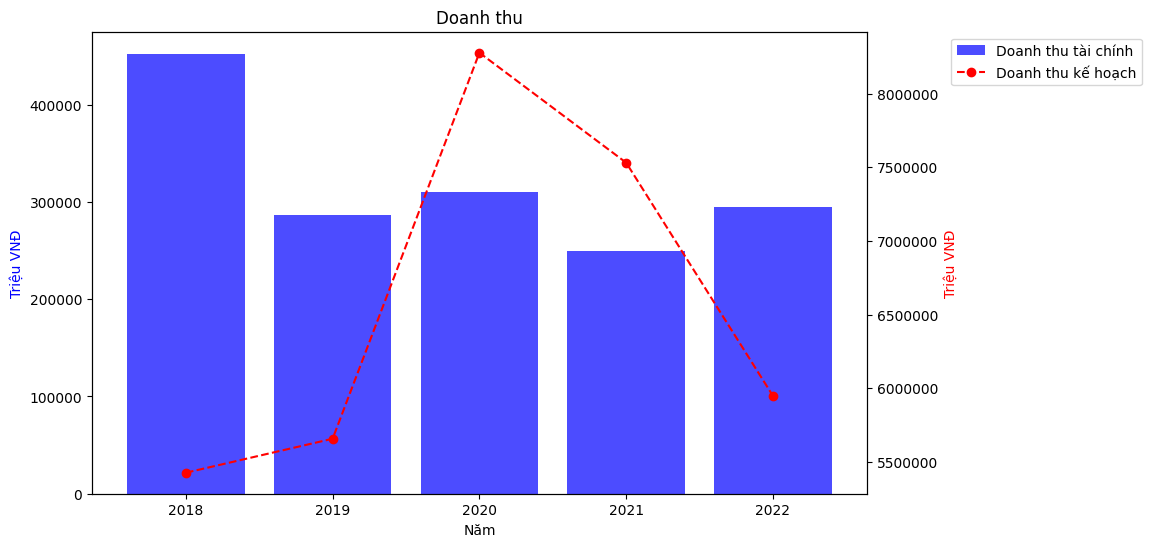

In [11]:
# Hàm định dạng cho trục y
def millions_formatter(value, _):
    return f'{value / 1e6:.0f}'

# Vẽ biểu đồ cột
fig, ax1 = plt.subplots(figsize=(10, 6))
bar1 = ax1.bar(df['dbYear'], df['KQKD. Doanh thu hoạt động tài chính Đơn vị: Triệu VND'], label='Doanh thu tài chính', color='blue', alpha=0.7)
ax1.set_xlabel('Năm')
ax1.set_ylabel('Triệu VNĐ', color='blue')
ax1.set_title('Doanh thu') 
ax2 = ax1.twinx()
line = ax2.plot(df['dbYear'], df['BCTCKH. Doanh thu kế hoạch Đơn vị: Triệu VND'], label='Doanh thu kế hoạch', marker='o', color='red',linestyle="--")
ax2.set_ylabel('Triệu VNĐ', color='red')
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x / 1e6:.0f}'))
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x / 1e6:.0f}'))
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(1.1, 1))
plt.show()

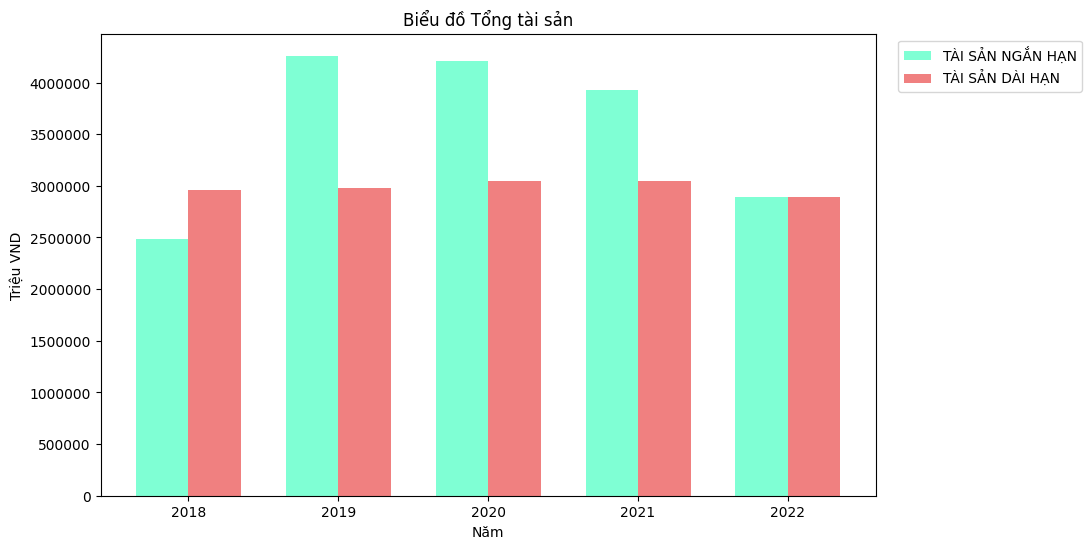

In [12]:
# Chọn cột để vẽ biểu đồ
columns_to_plot = ['CĐKT. TÀI SẢN NGẮN HẠN Đơn vị: Triệu VND', 'CĐKT. TÀI SẢN DÀI HẠN Đơn vị: Triệu VND']

# Vẽ biểu đồ cột đôi
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
bar_positions = range(len(df['dbYear']))

# Vẽ cột cho 'CĐKT. TÀI SẢN NGẮN HẠN'
ax.bar(bar_positions, df[columns_to_plot[0]], width=bar_width, label='TÀI SẢN NGẮN HẠN', color='aquamarine')
# Vẽ cột cho 'CĐKT. TÀI SẢN DÀI HẠN' 
ax.bar([pos + bar_width for pos in bar_positions], df[columns_to_plot[1]], width=bar_width, label='TÀI SẢN DÀI HẠN', color='lightcoral')
ax.set_xlabel('Năm')
ax.set_ylabel('Triệu VND')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x/1e6:.0f}'))
ax.set_xticks([pos + bar_width/2 for pos in bar_positions])
ax.set_xticklabels(df['dbYear'])
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.title('Biểu đồ Tổng tài sản')
plt.show()

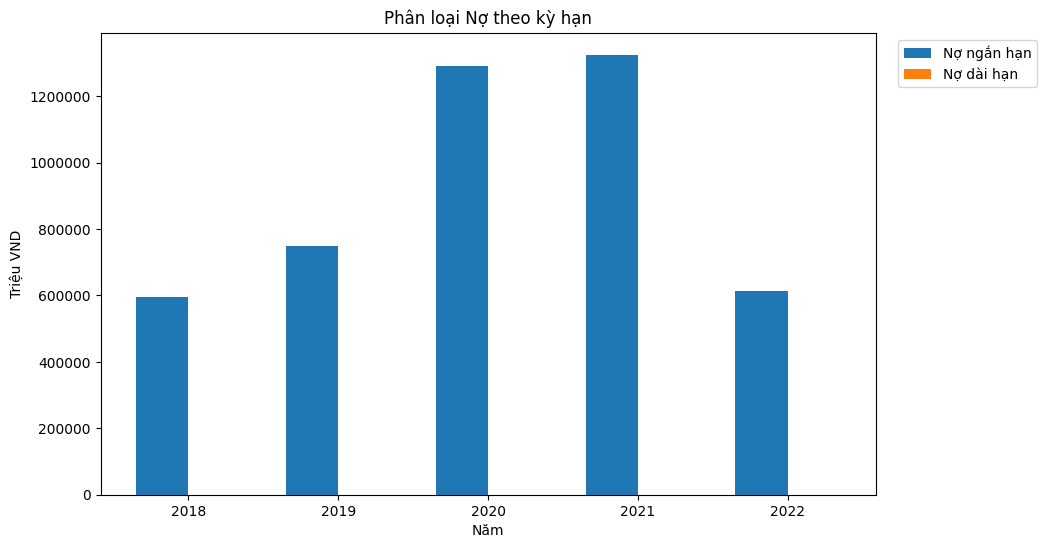

In [13]:
# Chọn cột để vẽ biểu đồ
columns_to_plot = ['CĐKT. Nợ ngắn hạn Đơn vị: Triệu VND', 'CĐKT. Nợ dài hạn Đơn vị: Triệu VND']

# Vẽ biểu đồ cột đôi
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
bar_positions = range(len(df['dbYear']))

# Vẽ cột cho 
ax.bar(bar_positions, df[columns_to_plot[0]], width=bar_width, label='Nợ ngắn hạn')
ax.bar([pos + bar_width for pos in bar_positions], df[columns_to_plot[1]], width=bar_width, label='Nợ dài hạn')
ax.set_xlabel('Năm')
ax.set_ylabel('Triệu VND')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x/1e6:.0f}'))
ax.set_xticks([pos + bar_width/2 for pos in bar_positions])
ax.set_xticklabels(df['dbYear'])
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.title('Phân loại Nợ theo kỳ hạn')
plt.show()

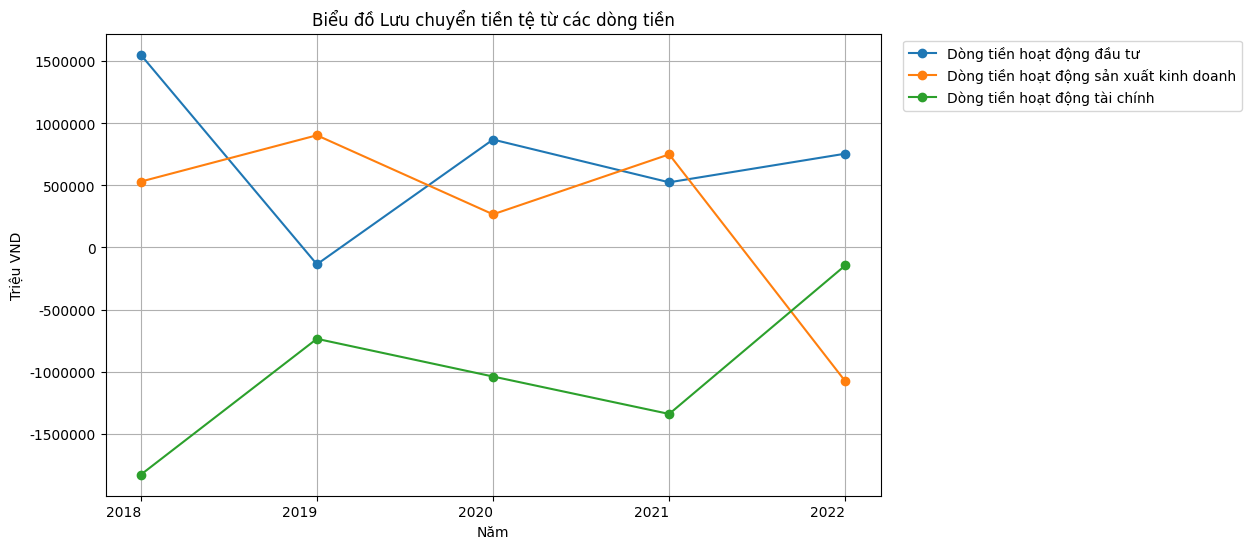

In [14]:
# Hàm định dạng cho trục y
def format_million(value, _):
    return f'{value / 1e6:.0f}'
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
# Biểu đồ đường 
plt.plot(df['dbYear'], df['LCTT. Lưu chuyển tiền tệ ròng từ hoạt động đầu tư (TT) Đơn vị: Triệu VND'], label='Dòng tiền hoạt động đầu tư', marker='o')
# Biểu đồ đường 
plt.plot(df['dbYear'], df['LCTT. Lưu chuyển tiền tệ ròng từ các hoạt động sản xuất kinh doanh (TT) Đơn vị: Triệu VND'], label='Dòng tiền hoạt động sản xuất kinh doanh', marker='o')
# Biểu đồ đường cho Lưu chuyển tiền tệ từ hoạt động tài chính
plt.plot(df['dbYear'], df['LCTT. Lưu chuyển tiền tệ từ hoạt động tài chính (TT) Đơn vị: Triệu VND'], label='Dòng tiền hoạt động tài chính', marker='o')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('Biểu đồ Lưu chuyển tiền tệ từ các dòng tiền')
plt.xlabel('Năm')
plt.xticks(df['dbYear'], rotation=0, ha='right')
plt.ylabel('Triệu VND')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.grid(True)
plt.show()

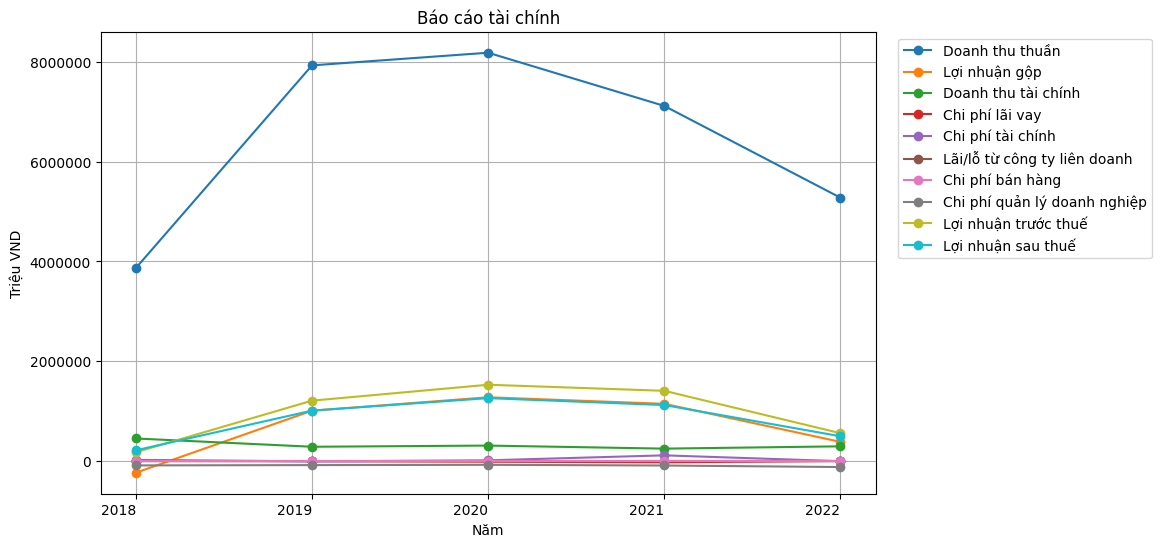

In [15]:
# Hàm định dạng cho trục y
def format_million(value, _):
    return f'{value / 1e6:.0f}'
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
# Biểu đồ đường 
plt.plot(df['dbYear'], df['KQKD. Doanh thu thuần Đơn vị: Triệu VND'], label='Doanh thu thuần', marker='o')
plt.plot(df['dbYear'], df['KQKD. Lợi nhuận gộp về bán hàng và cung cấp dịch vụ Đơn vị: Triệu VND'], label='Lợi nhuận gộp', marker='o')
plt.plot(df['dbYear'], df['KQKD. Doanh thu hoạt động tài chính Đơn vị: Triệu VND'], label='Doanh thu tài chính', marker='o')
plt.plot(df['dbYear'], df['KQKD. Trong đó: Chi phí lãi vay Đơn vị: Triệu VND'], label='Chi phí lãi vay', marker='o')
plt.plot(df['dbYear'], df['KQKD. Chi phí tài chính Đơn vị: Triệu VND'], label='Chi phí tài chính', marker='o')
plt.plot(df['dbYear'], df['KQKD. Lãi/lỗ từ công ty liên doanh Đơn vị: Triệu VND'], label='Lãi/lỗ từ công ty liên doanh', marker='o')
plt.plot(df['dbYear'], df['KQKD. Chi phí bán hàng Đơn vị: Triệu VND'], label='Chi phí bán hàng', marker='o')
plt.plot(df['dbYear'], df['KQKD. Chi phí quản lý doanh  nghiệp Đơn vị: Triệu VND'], label='Chi phí quản lý doanh nghiệp', marker='o')
plt.plot(df['dbYear'], df['KQKD. Tổng lợi nhuận kế toán trước thuế Đơn vị: Triệu VND'], label='Lợi nhuận trước thuế', marker='o')
plt.plot(df['dbYear'], df['KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp Đơn vị: Triệu VND'], label='Lợi nhuận sau thuế', marker='o')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('Báo cáo tài chính')
plt.xlabel('Năm')
plt.xticks(df['dbYear'], rotation=0, ha='right')
plt.ylabel('Triệu VND')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.grid(True)
plt.show()

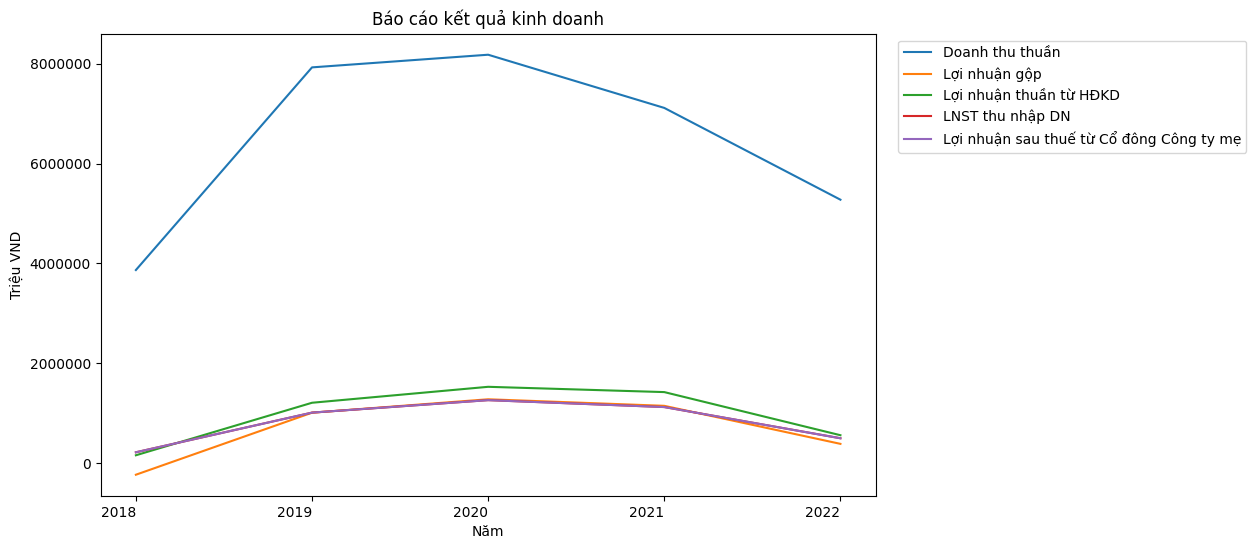

In [16]:
# Hàm định dạng cho trục y
def format_million(value, _):
    return f'{value / 1e6:.0f}'

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(df['dbYear'], df['KQKD. Doanh thu thuần Đơn vị: Triệu VND'], label='Doanh thu thuần')
plt.plot(df['dbYear'], df['KQKD. Lợi nhuận gộp về bán hàng và cung cấp dịch vụ Đơn vị: Triệu VND'], label='Lợi nhuận gộp')
plt.plot(df['dbYear'], df['KQKD. Lợi nhuận thuần từ hoạt động kinh doanh Đơn vị: Triệu VND'], label='Lợi nhuận thuần từ HĐKD')
plt.plot(df['dbYear'], df['KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp Đơn vị: Triệu VND'], label='LNST thu nhập DN')
plt.plot(df['dbYear'], df['KQKD. Cổ đông của Công ty mẹ Đơn vị: Triệu VND'], label='Lợi nhuận sau thuế từ Cổ đông Công ty mẹ')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('Báo cáo kết quả kinh doanh')
plt.xlabel('Năm')
plt.xticks(df['dbYear'], rotation=0, ha='right')
plt.ylabel('Triệu VND')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

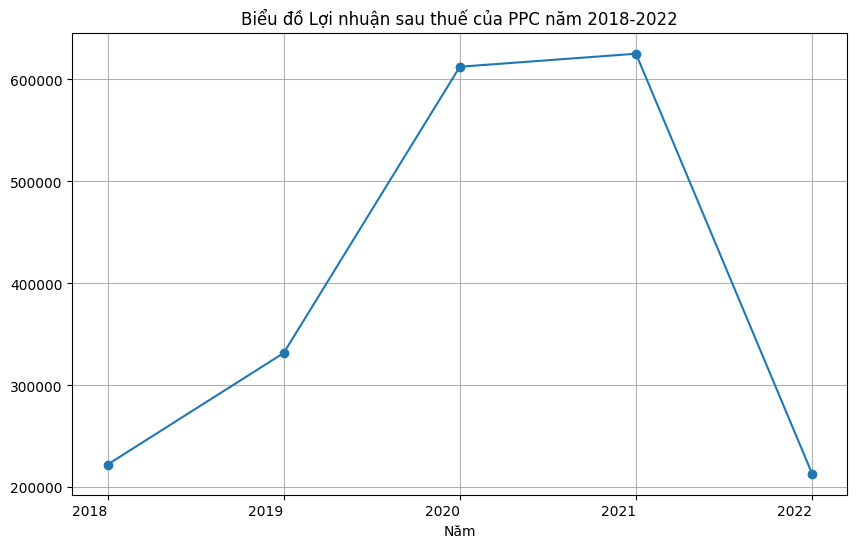

In [17]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(df['dbYear'], df['BCTCKH. Lợi nhuận sau thuế thu nhập doanh nghiệp Đơn vị: Triệu VND'], marker='o')
plt.xlabel('Năm')
plt.xticks(df['dbYear'], rotation=0, ha='right')
plt.ylabel('')
plt.title('Biểu đồ Lợi nhuận sau thuế của PPC năm 2018-2022')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_million))
plt.grid(True)
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_12080\1132936787.py:21: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax2.set_ylim(0, max(df['Tỷ lệ Nợ vay/VCSH']) * 1.2)


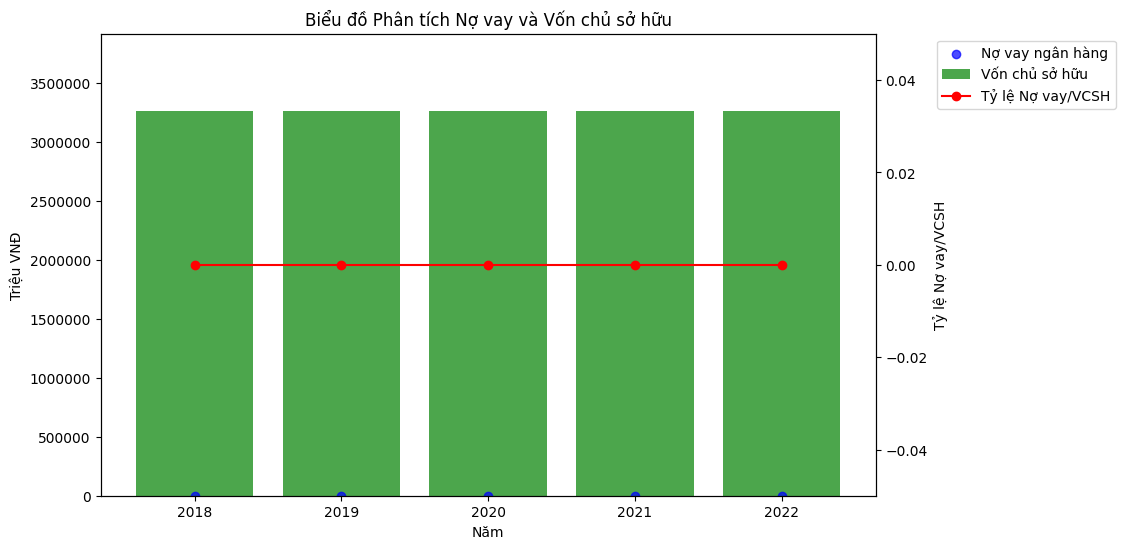

In [18]:
# Tính toán
df['Tỷ lệ Nợ vay/VCSH'] = df['TM. Vay ngân hàng Đơn vị: Triệu VND'] / df['TM. Vốn chủ sở hữu Đơn vị: Triệu VND']
# Hàm định dạng cho trục y
def format_million(value, _):
    return f'{value / 1e6:.0f}'
# Vẽ biểu đồ cột cho VCSH và biểu đồ chấm cho Nợ vay
fig, ax1 = plt.subplots(figsize=(10, 6))
bar1 = ax1.bar(df['dbYear'], df['TM. Vốn chủ sở hữu Đơn vị: Triệu VND'], label='Vốn chủ sở hữu', color='green', alpha=0.7)
scatter = ax1.scatter(df['dbYear'], df['TM. Vay ngân hàng Đơn vị: Triệu VND'], label='Nợ vay ngân hàng', color='blue', marker='o', alpha=0.7)
# Đặt nhãn và tiêu đề cho trục y1
ax1.set_xlabel('Năm')
ax1.set_ylabel('Triệu VNĐ')
ax1.set_title('Biểu đồ Phân tích Nợ vay và Vốn chủ sở hữu')
# Đặt giới hạn cho trục y1
ax1.set_ylim(0, max(df['TM. Vốn chủ sở hữu Đơn vị: Triệu VND']) * 1.2)
# Định dạng số liệu trục y1 với triệu VNĐ
ax1.yaxis.set_major_formatter(FuncFormatter(format_million))
# Tạo trục y thứ hai cho tỷ lệ nợ vay/vốn chủ sở hữu
ax2 = ax1.twinx()
line = ax2.plot(df['dbYear'], df['Tỷ lệ Nợ vay/VCSH'], label='Tỷ lệ Nợ vay/VCSH', marker='o', color='red')
ax2.set_ylim(0, max(df['Tỷ lệ Nợ vay/VCSH']) * 1.2)
ax2.set_ylabel('Tỷ lệ Nợ vay/VCSH')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(1.07, 1))
plt.show()

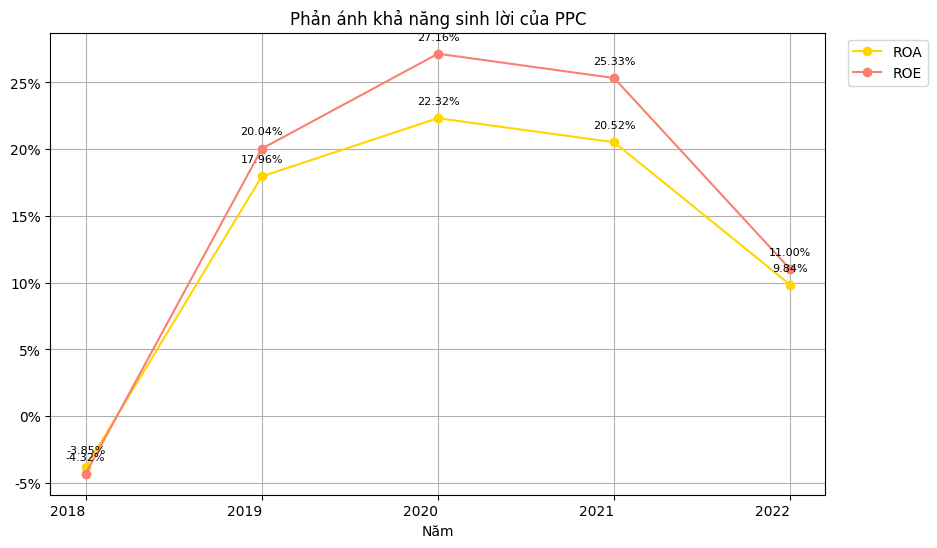

In [19]:
# Chuyển đổi cột 'dbYear' thành kiểu datetime
df['dbYear'] = pd.to_datetime(df['dbYear'])
df['dbYear'] = pd.to_numeric(df['dbYear'], errors='coerce')
#Tính toán giá trị 
Loi_nhuan_rong = (df['KQKD. Lợi nhuận gộp về bán hàng và cung cấp dịch vụ Đơn vị: Triệu VND'] -                     df['KQKD. Chi phí tài chính Đơn vị: Triệu VND'] - 
                  df['KQKD. Trong đó: Chi phí lãi vay Đơn vị: Triệu VND'] - 
                  df['KQKD. Chi phí bán hàng Đơn vị: Triệu VND'] - 
                  df['KQKD. Chi phí quản lý doanh  nghiệp Đơn vị: Triệu VND'] - 
                  df['KQKD. Chi phí thuế thu nhập doanh nghiệp Đơn vị: Triệu VND'])
duong_ROA = ((Loi_nhuan_rong) / df['CĐKT. TỔNG CỘNG TÀI SẢN Đơn vị: Triệu VND']) *100
duong_ROE = ((Loi_nhuan_rong) / df['CĐKT. VỐN CHỦ SỞ HỮU Đơn vị: Triệu VND']) *100

# Hàm định dạng cho trục y
def percent_formatter(x, pos):
    return f'{x:.0f}%'

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
# Biểu đồ đường ROA
plt.plot(df['dbYear'], duong_ROA, label='ROA', marker='o', color='gold')
# Biểu đồ đường ROE
plt.plot(df['dbYear'], duong_ROE, label='ROE', marker='o', color='salmon')

# Hiển thị phần trăm trên các điểm dữ liệu
for i, (x, y_roa, y_roe) in enumerate(zip(df['dbYear'], duong_ROA, duong_ROE)):
    plt.annotate(f'{y_roa:.2f}%', (x, y_roa), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='black')
    plt.annotate(f'{y_roe:.2f}%', (x, y_roe), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='black')
    
plt.title('Phản ánh khả năng sinh lời của PPC')
plt.xlabel('Năm')
plt.xticks(df['dbYear'], rotation=0, ha='right')
plt.ylabel('')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.gca().yaxis.set_major_formatter(FuncFormatter(percent_formatter))
plt.grid(True)
plt.show()

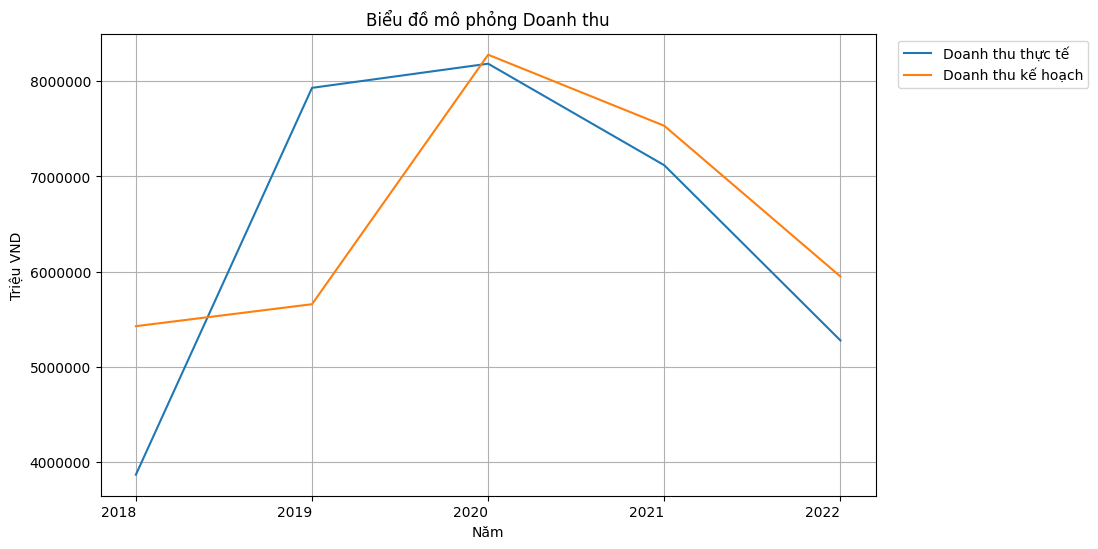

In [20]:
columns_to_plot = ['KQKD. Doanh thu bán hàng và cung cấp dịch vụ Đơn vị: Triệu VND',
                   'BCTCKH. Doanh thu kế hoạch Đơn vị: Triệu VND']

# Vẽ biểu đồ đường
fig, ax = plt.subplots(figsize=(10, 6))
# Vẽ đường cho cột thứ nhất
ax.plot(df['dbYear'], df[columns_to_plot[0]], label='Doanh thu thực tế')
# Vẽ đường cho cột thứ hai
ax.plot(df['dbYear'], df[columns_to_plot[1]], label='Doanh thu kế hoạch')
ax.set_xlabel('Năm')
plt.xticks(df['dbYear'], rotation=0, ha='right')
ax.set_ylabel('Triệu VND')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x/1e6:.0f}'))
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.title('Biểu đồ mô phỏng Doanh thu')
plt.grid(True)
plt.show()

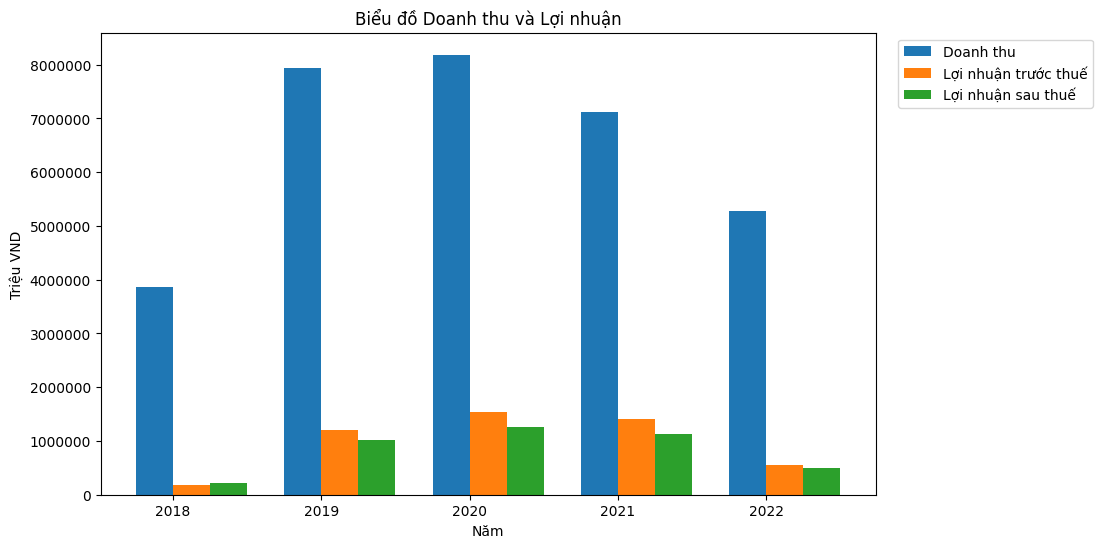

In [21]:
# Chọn cột để vẽ biểu đồ
columns_to_plot = ['KQKD. Doanh thu bán hàng và cung cấp dịch vụ Đơn vị: Triệu VND',
                   'KQKD. Tổng lợi nhuận kế toán trước thuế Đơn vị: Triệu VND',
                   'KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp Đơn vị: Triệu VND']

# Vẽ biểu đồ 
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
bar_positions = range(len(df['dbYear'])) 
ax.bar(bar_positions, df[columns_to_plot[0]], width=bar_width, label='Doanh thu')
ax.bar([pos + bar_width for pos in bar_positions], df[columns_to_plot[1]], width=bar_width, label='Lợi nhuận trước thuế')
ax.bar([pos + 2*bar_width for pos in bar_positions], df[columns_to_plot[2]], width=bar_width, label='Lợi nhuận sau thuế')
ax.set_xlabel('Năm')
ax.set_ylabel('Triệu VND')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x/1e6:.0f}'))
ax.set_xticks([pos + bar_width/2 for pos in bar_positions])
ax.set_xticklabels(df['dbYear'])
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.title('Biểu đồ Doanh thu và Lợi nhuận')
plt.show()